In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import  classification_report
from sklearn.svm import SVC

In [2]:
churn = pd.read_csv('/content/churn_Dataset.csv')

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.shape

(7043, 21)

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# check null

In [6]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
churn = churn.drop('customerID', axis=1)

In [8]:
#transform the type of TotalCharges from object to numrical
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [9]:
churn.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
churn.duplicated().sum()

22

In [11]:
churn.drop_duplicates(inplace=True)

In [12]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Churn' column
churn['Churn'] = label_encoder.fit_transform(churn['Churn'])

# Print the unique values after label encoding
print("Churn ", churn['Churn'].unique())

Churn  [0 1]


In [13]:
#select the numrical features only and drop target
numerical_features = churn.select_dtypes(include=['int64', 'float64']).drop(['Churn'], axis=1)

In [14]:
numerical_features.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [15]:
#drop SeniorCitizen from the numrical features
numerical_features.drop(['SeniorCitizen'], axis=1, inplace=True)

In [16]:
# Convert the 'SeniorCitizen' column to object type
churn['SeniorCitizen'] = churn['SeniorCitizen'].astype(object)

In [17]:
from tabulate import tabulate
from scipy.stats import f_oneway
target_column = 'Churn'
significance_level = 0.05

# Extract numeric features from the DataFrame
numeric_features = churn.select_dtypes(include=['float64', 'int64']).columns
churn.fillna(numerical_features.median(), inplace=True)
# Create a list to store results
results = []

# Perform ANOVA test for each numeric feature
for column in numeric_features:
    if column != target_column:
        # Perform ANOVA test
        _, p = f_oneway(*[churn[churn[target_column] == group][column] for group in churn[target_column].unique()])

        significance = "Significant" if p < significance_level else "Not Significant"

        results.append([column, p, significance])

# Create a DataFrame from the results
result_df = pd.DataFrame(results, columns=["Feature", "P-value", "Significance"])

# Print the tabulated results
print('ANOVA Test Between The Target Variable (Churn) And the Numeric Features:')
print(tabulate(result_df, headers='keys', tablefmt='pretty', showindex=False))


ANOVA Test Between The Target Variable (Churn) And the Numeric Features:
+----------------+-------------------------+--------------+
|    Feature     |         P-value         | Significance |
+----------------+-------------------------+--------------+
|     tenure     | 2.6280951730468055e-203 | Significant  |
| MonthlyCharges |  8.041921866085037e-61  | Significant  |
|  TotalCharges  |  6.007885242273341e-63  | Significant  |
+----------------+-------------------------+--------------+


# Searching About Outliers

<Figure size 1600x800 with 0 Axes>

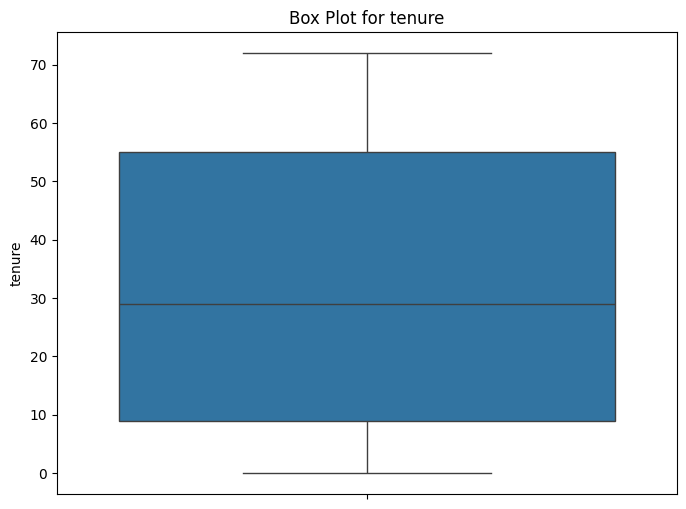

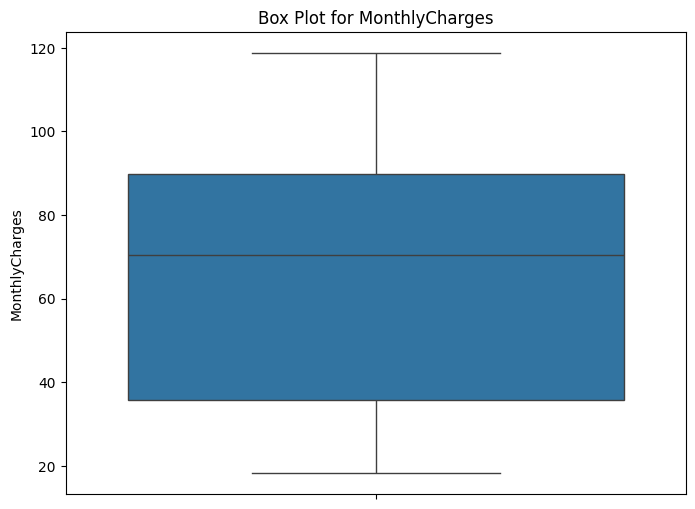

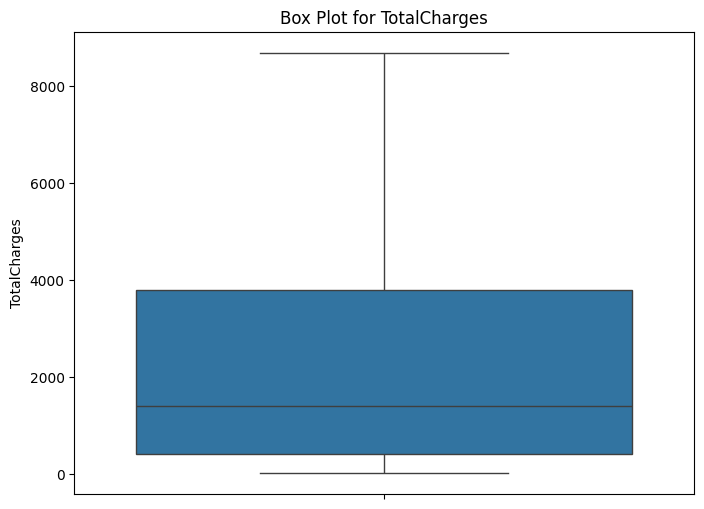

In [18]:
# Set the size of the figure
plt.figure(figsize=(16, 8))

# Iterate through each numerical feature and create a box plot
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=numerical_features[column])  # Use 'y' instead of 'x'
    plt.title(f'Box Plot for {column}')
    plt.show()

# Check for multicollinearity


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numerical_features.fillna(numerical_features.median(), inplace=True)
# Compute the VIF for each independent variable
vif = pd.DataFrame()
vif["variable"] = numerical_features.columns
vif["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
# Select variables with high VIF
high_vif_variables = vif[vif["VIF"] > 10]["variable"]
print(high_vif_variables)

Series([], Name: variable, dtype: object)


In [20]:
#select the catgorical features only and drop target
categorical_features = churn.select_dtypes(include=[object])

In [21]:
#Ensure from the count of catgorical features
cat_columns = len(categorical_features.columns)
print(f"Number of columns in categorical_features: {cat_columns}")

Number of columns in categorical_features: 16


In [22]:
categorical_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


# Chi_Squre Test

In [23]:
from scipy.stats import chi2_contingency
# Assuming df is your DataFrame with categorical features and target variable
# Replace 'TargetColumn' with the actual name of your target column
target_column = 'Churn'
significance_level = 0.05

# Create a list to store results
results = []

# Create a contingency table for each pair of categorical feature and target variable
for column in categorical_features:
    if column != target_column:
        contingency_table = pd.crosstab(categorical_features[column], churn[target_column])
        chi2, p, _, _ = chi2_contingency(contingency_table)

        significance = "Significant" if p < significance_level else "Not Significant"

        results.append([column, chi2, p, significance])

# Create a DataFrame from the results
result_df = pd.DataFrame(results, columns=["Feature", "Chi2 Statistic", "P-value", "Significance"])

# Print the tabulated results
print('chi_squre Test Between The Target Varaible (churn) And the Categorical Features :')
print(tabulate(result_df, headers='keys', tablefmt='pretty', showindex=False))

chi_squre Test Between The Target Varaible (churn) And the Categorical Features :
+------------------+--------------------+-------------------------+-----------------+
|     Feature      |   Chi2 Statistic   |         P-value         |  Significance   |
+------------------+--------------------+-------------------------+-----------------+
|      gender      | 0.5000878161200975 |   0.4794615390898278    | Not Significant |
|  SeniorCitizen   | 160.46957083016565 |  8.934159012714662e-37  |   Significant   |
|     Partner      |  155.47964557828   | 1.0999615978939857e-35  |   Significant   |
|    Dependents    | 186.78556926358303 | 1.5995676694072134e-42  |   Significant   |
|   PhoneService   | 0.8155175177999405 |   0.3664940064978197    | Not Significant |
|  MultipleLines   | 12.361805177229707 |  0.0020685599531309134  |   Significant   |
| InternetService  | 732.0574641622607  | 1.0857790034735195e-159 |   Significant   |
|  OnlineSecurity  | 846.7821197978094  | 1.32922652378789

In [24]:
churn = churn.drop(['gender', 'PhoneService'], axis=1)

# categorical feature encoder

In [25]:
churn.dtypes

SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [26]:
churn = pd.get_dummies(churn,drop_first=True)
churn.head()

<ipython-input-26-a11491f3b205>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  churn = pd.get_dummies(churn,drop_first=True)


,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


# feature selection using correlation between features

In [27]:
encoded_feature = churn.drop(['Churn'], axis=1)
encoded_feature.corr()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,1.000000,0.245251,0.824871,0.015349,0.377346,0.157603,-0.009786,0.329742,0.018448,-0.035206,...,-0.035206,0.277575,-0.035206,0.283932,0.201110,0.557984,0.005053,0.231597,-0.209731,-0.230606
MonthlyCharges,0.245251,1.000000,0.650339,0.219434,0.094301,-0.116191,-0.248984,0.489539,0.787040,-0.762552,...,-0.762552,0.629272,-0.762552,0.627082,0.003371,-0.076580,0.351125,0.029055,0.270444,-0.374214
TotalCharges,0.824871,0.650339,1.000000,0.101884,0.316314,0.061705,-0.114224,0.467306,0.361046,-0.373483,...,-0.373483,0.514120,-0.373483,0.518723,0.169381,0.355208,0.157676,0.181470,-0.060592,-0.292708
SeniorCitizen_1,0.015349,0.219434,0.101884,1.000000,0.015553,-0.212115,-0.008909,0.142357,0.254973,-0.181940,...,-0.181940,0.104765,-0.181940,0.119584,-0.046823,-0.117694,0.156196,-0.024683,0.171347,-0.152338
Partner_Yes,0.377346,0.094301,0.316314,0.015553,1.000000,0.451659,-0.018728,0.139834,-0.000717,0.003720,...,0.003720,0.122572,0.003720,0.115284,0.081379,0.246870,-0.015776,0.080592,-0.084500,-0.092031
Dependents_Yes,0.157603,-0.116191,0.061705,-0.212115,0.451659,1.000000,0.001092,-0.026324,-0.166859,0.142531,...,0.142531,-0.018207,0.142531,-0.041441,0.067388,0.203697,-0.112220,0.059256,-0.151232,0.061789
MultipleLines_No phone service,-0.009786,-0.248984,-0.114224,-0.008909,-0.018728,0.001092,1.000000,-0.280935,-0.290810,-0.171839,...,-0.171839,0.021788,-0.171839,0.032179,0.002264,-0.004099,-0.016824,0.007187,-0.003204,0.004555
MultipleLines_Yes,0.329742,0.489539,0.467306,0.142357,0.139834,-0.026324,-0.280935,1.000000,0.366127,-0.208861,...,-0.208861,0.255579,-0.208861,0.257170,-0.005178,0.104918,0.163249,0.058736,0.083474,-0.225181
InternetService_Fiber optic,0.018448,0.787040,0.361046,0.254973,-0.000717,-0.166859,-0.290810,0.366127,1.000000,-0.464480,...,-0.464480,0.329311,-0.464480,0.322868,-0.077008,-0.212530,0.325683,-0.050724,0.335187,-0.304940
InternetService_No,-0.035206,-0.762552,-0.373483,-0.181940,0.003720,0.142531,-0.171839,-0.208861,-0.464480,1.000000,...,1.000000,-0.414996,1.000000,-0.418121,0.039812,0.221016,-0.319512,0.002717,-0.283169,0.316886


In [28]:
churn.drop(['Partner_Yes', 'Dependents_Yes','tenure'], axis=1, inplace=True)

In [29]:
# Data Separation as X and Y
y= churn['Churn']
x= churn.drop('Churn',axis=1)

In [30]:
print(y.value_counts())

0    5164
1    1857
Name: Churn, dtype: int64


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=33,shuffle=True)


# Data scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler
# Create the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform on training data
x_train = scaler.fit_transform(x_train)

# Transform on test data
x_test = scaler.fit_transform(x_test)

# Transform on test data
x_test = scaler.fit_transform(x_test)


# Assuming x_train and x_test are NumPy arrays
cols = list(range(x_train.shape[1]))
# Convert the standardized NumPy arrays back to DataFrames
x_train = pd.DataFrame(x_train, columns=cols)
x_test = pd.DataFrame(x_test, columns=cols)

In [33]:
print('Data:    ',churn.shape)
print('----------------')
print('x train: ',x_train.shape)
print('y train: ',y_train.shape)
print('----------------')
print('x test:  ',x_test.shape)
print('y test:  ',y_test.shape)
print('----------------')

Data:     (7021, 26)
----------------
x train:  (5265, 25)
y train:  (5265,)
----------------
x test:   (1756, 25)
y test:   (1756,)
----------------


# Logistic Regression Model

In [34]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=0.2,random_state=33)
LogisticRegressionModel.fit(x_train, y_train)
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(x_train,  y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(x_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

LogisticRegressionModel Train Score is :  0.8
LogisticRegressionModel Test Score is :  0.8046697038724373
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [21]


In [35]:
 y_pred = LogisticRegressionModel.predict(x_test)
 y_pred_prob = LogisticRegressionModel.predict_proba(x_test)
 print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
 print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [0 0 0 1 0 1 0 1 1 0]
Prediction Probabilities Value for LogisticRegressionModel is :  [[0.96242252 0.03757748]
 [0.96817848 0.03182152]
 [0.88144745 0.11855255]
 [0.44533408 0.55466592]
 [0.86846306 0.13153694]
 [0.3632184  0.6367816 ]
 [0.94725866 0.05274134]
 [0.42903464 0.57096536]
 [0.47112077 0.52887923]
 [0.98025554 0.01974446]]


In [36]:
acc =accuracy_score(y_test,y_pred)
print("accuracy score is : ",acc)

accuracy score is :  0.8046697038724373


In [37]:
ps = precision_score(y_test,y_pred,average='macro')
print('precision score is',ps)

precision score is 0.756831548111541


In [38]:
rc = recall_score(y_test,y_pred,average='macro')
print('recall_score',rc)

recall_score 0.7259086058782165


In [39]:
 fs = f1_score(y_test,y_pred, average=None)
print('f1 score is',fs)

f1 score is [0.87012495 0.60619977]


In [40]:
class_report_test = classification_report(y_test, y_pred)
print("\nClassification Report_test set:")
print(class_report_test)


Classification Report_test set:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1279
           1       0.67      0.55      0.61       477

    accuracy                           0.80      1756
   macro avg       0.76      0.73      0.74      1756
weighted avg       0.80      0.80      0.80      1756



# SVM Model

In [41]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV

# Define Support Vector Machine (SVM) Model
svm_model = SVC()

# Set Up Parameter Grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 0.001, 0.15],
    'gamma': ['auto']
}

# Create GridSearchCV Object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(x_train, y_train)

# Get Best Parameters and Model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Print the best parameters found by GridSearchCV
print("Best Parameters:", best_params)

# Evaluate the model using cross-validation
cv_scores = cross_val_score (best_svm_model, x_train, y_train,cv=5, scoring='f1_weighted')
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Evaluate the model on the test set and train set using the best parameters
y_svm_pred_test = best_svm_model.predict(x_test)
y_svm_pred_train = best_svm_model.predict(x_train)

# Calculate F1 score on the test set
f1_test = f1_score(y_test, y_svm_pred_test, average='weighted')
print("F1 Score on Test Set:", f1_test)

f1_train = f1_score(y_train, y_svm_pred_train, average='weighted')
print("F1 Score on Train Set:", f1_train)


# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_svm_pred_test)

# Evaluate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_svm_pred_train)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


# Classification Report
class_report_test = classification_report(y_test, y_svm_pred_test)
print("\nClassification Report_test set:")
print(class_report_test)

class_report_train = classification_report(y_train,y_svm_pred_train)
print("\nClassification Report_train set:")
print(class_report_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
Cross-Validation Scores: [0.77768925 0.79449459 0.7842061  0.78697011 0.78610037]
Average Cross-Validation Score: 0.7858920815833879
F1 Score on Test Set: 0.79910654237301
F1 Score on Train Set: 0.786964281840506
Training Accuracy: 0.794681861348528
Test Accuracy: 0.8052391799544419

Classification Report_test set:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1279
           1       0.67      0.56      0.61       477

    accuracy                           0.81      1756
   macro avg       0.76      0.73      0.74      1756
weighted avg       0.80      0.81      0.80      1756


Classification Report_train set:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3885
           1       0.63      0.51      0.57      1380

    accuracy                     

# Decision Tree Model

In [42]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)

DecisionTreeClassifierModel Train Score is :  0.9969610636277303
DecisionTreeClassifierModel Test Score is :  0.7317767653758542
DecisionTreeClassifierModel Classes are :  [0 1]
DecisionTreeClassifierModel feature importances are :  [0.24964923 0.32377888 0.02549895 0.00364993 0.01217557 0.03490744
 0.00940076 0.         0.01297766 0.         0.01690872 0.
 0.01812116 0.         0.01709471 0.         0.01393778 0.
 0.01827412 0.05975189 0.10294085 0.02494906 0.0120721  0.02380258
 0.02010861]


In [43]:
y_pred = DecisionTreeClassifierModel.predict(x_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(x_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for DecisionTreeClassifierModel is :  [0 0 1 0 0 1 0 1 0 0]
Prediction Probabilities Value for DecisionTreeClassifierModel is :  [[1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.5 0.5]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]]


In [44]:
acc =accuracy_score(y_test,y_pred)
print("accuracy score is : ",acc)

accuracy score is :  0.7317767653758542


In [45]:
ps = precision_score(y_test,y_pred,average='macro')
print('precision score is',ps)

precision score is 0.6595795078466958


In [46]:
rc = recall_score(y_test,y_pred,average='macro')
print('recall_score',rc)

recall_score 0.6568081720028258


In [47]:
 fs = f1_score(y_test,y_pred, average=None)
print('f1 score is',fs)

f1 score is [0.8168028  0.49946865]


In [48]:
class_report_test = classification_report(y_test, y_pred)
print("\nClassification Report_test set:")
print(class_report_test)


Classification Report_test set:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1279
           1       0.51      0.49      0.50       477

    accuracy                           0.73      1756
   macro avg       0.66      0.66      0.66      1756
weighted avg       0.73      0.73      0.73      1756



# KNN Model

In [49]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', algorithm='auto')
KNNClassifierModel.fit(x_train, y_train)

KNeighborsClassifier()

In [50]:
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(x_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(x_test, y_test))

KNNClassifierModel Train Score is :  0.835707502374169
KNNClassifierModel Test Score is :  0.7585421412300684


In [51]:
y_pred = KNNClassifierModel.predict(x_test)
y_pred_prob = KNNClassifierModel.predict_proba(x_test)
print('Predicted Value for KNNClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for KNNClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for KNNClassifierModel is :  [0 0 1 1 0 1 0 1 1 0]
Prediction Probabilities Value for KNNClassifierModel is :  [[1.  0. ]
 [1.  0. ]
 [0.4 0.6]
 [0.4 0.6]
 [0.6 0.4]
 [0.4 0.6]
 [1.  0. ]
 [0.4 0.6]
 [0.2 0.8]
 [1.  0. ]]


In [52]:
acc =accuracy_score(y_test,y_pred)
print("accuracy score is : ",acc)

accuracy score is :  0.7585421412300684


In [53]:
ps = precision_score(y_test,y_pred,average='macro')
print('precision score is',ps)

precision score is 0.6916764652155947


In [54]:
rc = recall_score(y_test,y_pred,average='macro')
print('recall_score',rc)

recall_score 0.6771537643238706


In [55]:
 fs = f1_score(y_test,y_pred, average=None)
print('f1 score is',fs)

f1 score is [0.83767228 0.52888889]


In [56]:
class_report_test = classification_report(y_test, y_pred)
print("\nClassification Report_test set:")
print(class_report_test)


Classification Report_test set:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1279
           1       0.56      0.50      0.53       477

    accuracy                           0.76      1756
   macro avg       0.69      0.68      0.68      1756
weighted avg       0.75      0.76      0.75      1756



# Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [250,100,50],
    'max_depth': [5, 1, 2],
    'min_samples_split': [10,8,5],
    'min_samples_leaf': [1, 2,3],
    'max_features': ['sqrt', 'auto', None],
    'bootstrap': [True, False]
 }
# Perform GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, scoring='f1', cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring='f1_weighted')
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# #calculate_(f1_score)
# # Evaluate the model on the test set and train test using the best parameters
best_rf_model = grid_search.best_estimator_

y_rf_pred_test = best_rf_model.predict(x_test)
y_rf_pred_train= best_rf_model.predict(x_train)


# Calculate F1 score on the test set
f1_test = f1_score(y_test, y_rf_pred_test, average='weighted')
print("F1 Score on Test Set:", f1_test)
f1_train = f1_score(y_train, y_rf_pred_train, average='weighted')
print("F1 Score on train Set:", f1_train)


#calculate_accurcy
# Evaluate on the test set
test_accuracy = accuracy_score(y_test, y_rf_pred_test)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_rf_pred_train)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


# Classification Report
class_report_test = classification_report(y_test, y_rf_pred_test)

class_report_train = classification_report(y_train,y_rf_pred_train)

print("\nClassification Report_test set:")
print(class_report_test)


print("\nClassification Report_train set:")
print(class_report_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}
Cross-Validation Scores: [0.79105946 0.78823635 0.79156137 0.78691656 0.78329723]
Average Cross-Validation Score: 0.7882141961891904
F1 Score on Test Set: 0.7744983501414414
F1 Score on train Set: 0.7953756792503207
Training Accuracy: 0.8075973409306743
Test Accuracy: 0.7881548974943052

Classification Report_test set:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1279
           1       0.66      0.45      0.54       477

    accuracy                           0.79      1756
   macro avg       0.74      0.68      0.70      1756
weighted avg       0.77      0.79      0.77      1756


Classification Report_train set:
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      3885
           1       0.69      0.48      0.57      1380

    accurac

# XG Boost Model

In [58]:
from xgboost import XGBClassifier
# Define the Random Forest model
xg_model =  XGBClassifier()

# Define the parameter grid for GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.001],
    'n_estimators': [25,100, 50],
    'subsample': [ 0.8, 1.0],
    'min_child_weight' : [1,0.5],
    'colsample_bytree' :[ 0.8, 0.5,0.2],
    'max_depth': [ 10,5, 3],

}


# Perform GridSearchCV
grid_search = GridSearchCV(xg_model, param_grid, scoring='f1', cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)


# Evaluate the model using cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring='f1_weighted')
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# #calculate_(f1_score)
# # Evaluate the model on the test set and train test using the best parameters
best_xg_model = grid_search.best_estimator_

y_xg_pred_test = best_xg_model.predict(x_test)
y_xg_pred_train= best_xg_model.predict(x_train)



# Calculate F1 score on the test set
f1_test = f1_score(y_test, y_xg_pred_test, average='weighted')
print("F1 Score on Test Set:", f1_test)
f1_train = f1_score(y_train, y_xg_pred_train, average='weighted')
print("F1 Score on train Set:", f1_train)



#calculate_accurcy
# Evaluate on the test set
test_accuracy = accuracy_score(y_test, y_xg_pred_test)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_xg_pred_train)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


# Classification Report
class_report_test = classification_report(y_test, y_xg_pred_test)

class_report_train = classification_report(y_train,y_xg_pred_train)

print("\nClassification Report_test set:")
print(class_report_test)


print("\nClassification Report_train set:")
print(class_report_train)



Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 0.5, 'n_estimators': 100, 'subsample': 1.0}
Cross-Validation Scores: [0.75867011 0.76163767 0.75016126 0.77039069 0.76364643]
Average Cross-Validation Score: 0.7609012314512619
F1 Score on Test Set: 0.7501837114726518
F1 Score on train Set: 0.8140664229455472
Training Accuracy: 0.8360873694207027
Test Accuracy: 0.7818906605922551

Classification Report_test set:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1279
           1       0.72      0.32      0.44       477

    accuracy                           0.78      1756
   macro avg       0.76      0.64      0.65      1756
weighted avg       0.77      0.78      0.75      1756


Classification Report_train set:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      3885
           1       0.89      0.43      0.58      1380

    acc

# Gradient Boosting Model

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
# Define the Random Forest model
gb_model = GradientBoostingClassifier()

# Define the parameter grid for GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.001],
    'n_estimators': [250, 100,50],
    'subsample': [0.5, 1.0],
    'min_samples_split': [ 10, 100,50],
    'min_samples_leaf': [ 2, 1],
    'max_depth': [ 2,3,5],

}

# Perform GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, scoring='f1', cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring='f1_weighted')
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# #calculate_(f1_score)
# # Evaluate the model on the test set and train test using the best parameters
best_gb_model = grid_search.best_estimator_

y_gb_pred_test = best_gb_model.predict(x_test)
y_gb_pred_train= best_gb_model.predict(x_train)

# Calculate F1 score on the test set
f1_test = f1_score(y_test, y_gb_pred_test, average='weighted')
print("F1 Score on Test Set:", f1_test)
f1_train = f1_score(y_train, y_gb_pred_train, average='weighted')
print("F1 Score on train Set:", f1_train)



#calculate_accurcy
# Evaluate on the test set
test_accuracy = accuracy_score(y_test, y_gb_pred_test)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_gb_pred_train)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")



# Classification Report
class_report_test = classification_report(y_test, y_gb_pred_test)

class_report_train = classification_report(y_train,y_gb_pred_train)

print("\nClassification Report_test set:")
print(class_report_test)

print("\nClassification Report_train set:")
print(class_report_train)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 100, 'n_estimators': 250, 'subsample': 0.5}
Cross-Validation Scores: [0.79191212 0.78535128 0.79074065 0.78898842 0.7939522 ]
Average Cross-Validation Score: 0.7901889355131093
F1 Score on Test Set: 0.777917437316979
F1 Score on train Set: 0.8064685179589289
Training Accuracy: 0.8193732193732194
Test Accuracy: 0.7921412300683371

Classification Report_test set:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1279
           1       0.67      0.45      0.54       477

    accuracy                           0.79      1756
   macro avg       0.75      0.69      0.70      1756
weighted avg       0.78      0.79      0.78      1756


Classification Report_train set:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      3885
           1       0.73      0.49      0.59      1380

    accura

# PCA Algorithm

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# pca = PCA()
# pca.fit(x)
# explained_variance = pca.explained_variance_ratio_
# cumulative_explained_variance = np.cumsum(explained_variance)
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance')
# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

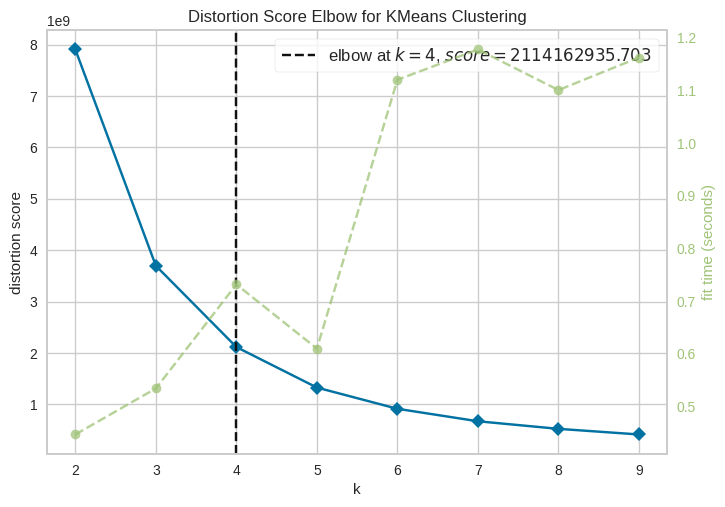

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
!pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 # Fit the data to the visualizer
visualizer.fit(x)
visualizer.show()

In [ ]:
from sklearn.decomposition import PCA
PCAModel = PCA(n_components=4,svd_solver='auto')
PCAModel.fit(x_train)
NewPCA = PCAModel.transform(x_test)
print('PCAModel Train Score is : ',PCAModel.score(x_train))
print('PCAModel Test Score is : ',PCAModel.score(x_test))
print('PCAModel Score Samples is : ',PCAModel.score_samples(x_test))
print('PCAModel NO. of components is : ',PCAModel.components_)
print('PCAModel Explained Variance is : ',PCAModel.explained_variance_)
print('PCAModel Explained Variance ratio is : ',PCAModel.explained_variance_ratio_)
print('PCAModel Singular value is : ',PCAModel.singular_values_)
print('PCAModel mean is : ',PCAModel.mean_)